In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
# Setting up logging for traceability
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

In [3]:
logger.info("Loading train and test datasets")

2024-09-21 08:19:10,621 - INFO - Loading train and test datasets


In [4]:
df_store = pd.read_csv('../data/store.csv')
df_store.rename(columns={df_store.columns[0]: 'Id'}, inplace=True)
df_train = pd.read_csv('../data/train.csv')
df_train.rename(columns={df_train.columns[0]: 'Id'}, inplace=True)
df_test = pd.read_csv('../data/test.csv')


print(df_store.head())
print(df_train.head())
print(df_test.head())

   Id StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0   1         c          a               1270.0                        9.0   
1   2         a          a                570.0                       11.0   
2   3         a          a              14130.0                       12.0   
3   4         c          c                620.0                        9.0   
4   5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3       

/tmp/ipykernel_6672/3985341362.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/train.csv')


In [5]:
logging.info("Merging the store and the train datasets")
df_merged = pd.merge(df_train,df_store, on='Id', how='inner')
print(df_merged)
df_merged.to_csv('../data/merged.csv',index=False)

2024-09-21 08:19:11,092 - INFO - Merging the store and the train datasets


           Id  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          5  2015-07-31   5263        555     1      1   
1           2          5  2015-07-31   6064        625     1      1   
2           3          5  2015-07-31   8314        821     1      1   
3           4          5  2015-07-31  13995       1498     1      1   
4           5          5  2015-07-31   4822        559     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
1017204  1111          2  2013-01-01      0          0     0      0   
1017205  1112          2  2013-01-01      0          0     0      0   
1017206  1113          2  2013-01-01      0          0     0      0   
1017207  1114          2  2013-01-01      0          0     0      0   
1017208  1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a          

In [6]:
logger.info(f"Train dataset shape: {df_store.shape}")
logger.info(f"Test dataset shape: {df_train.shape}")
logger.info(f"merged dataset shape: {df_merged.shape}")
logger.info(f"Train dataset columns: {df_test.shape}")

2024-09-21 08:19:15,356 - INFO - Train dataset shape: (1115, 10)
2024-09-21 08:19:15,356 - INFO - Test dataset shape: (1017209, 9)
2024-09-21 08:19:15,357 - INFO - merged dataset shape: (1017209, 18)
2024-09-21 08:19:15,357 - INFO - Train dataset columns: (41088, 8)


In [7]:
logging.info('checking for the data types of the columns')
print(df_merged.dtypes)
print(df_test.dtypes)

2024-09-21 08:19:15,518 - INFO - checking for the data types of the columns


Id                             int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


In [8]:
logging.info(f'checking for the missing values in the columns: {df_merged.isnull().sum()}')
logging.info(f'checking for the missing values in the columns: {df_test.isnull().sum()}')

2024-09-21 08:19:15,646 - INFO - checking for the missing values in the columns: Id                                0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
2024-09-21 08:19:15,651 - INFO - checking for the missing values in the columns: Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [9]:
logging.info('Handling missing values for the "CompetionDistance" column')
df_merged['CompetitionDistance'].fillna(df_merged['CompetitionDistance'].mean(), inplace=True)
logging.info(f'Checking for missing values in the columns: {df_merged.isnull().sum()}')

2024-09-21 08:19:15,656 - INFO - Handling missing values for the "CompetionDistance" column
/tmp/ipykernel_6672/3971531087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['CompetitionDistance'].fillna(df_merged['CompetitionDistance'].mean(), inplace=True)
2024-09-21 08:19:15,780 - INFO - Checking for missing values in the columns: Id                                0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open 

In [10]:
# Converting the Date to datetime format
logging.info('Converting the Date Column to datetime format')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
print(df_merged['Date'].head())

2024-09-21 08:19:15,785 - INFO - Converting the Date Column to datetime format


0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]


In [11]:
# extracting features from the Date column
logging.info('Extracting the date features from the Date column')
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Day'] = df_merged['Date'].dt.day
df_merged['DayOfWeek'] = df_merged['Date'].dt.dayofweek
df_merged['WeekOfYear'] = df_merged['Date'].dt.isocalendar().week
print(df_merged.head())

2024-09-21 08:19:15,844 - INFO - Extracting the date features from the Date column


   Id  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0   1          4 2015-07-31   5263        555     1      1            0   
1   2          4 2015-07-31   6064        625     1      1            0   
2   3          4 2015-07-31   8314        821     1      1            0   
3   4          4 2015-07-31  13995       1498     1      1            0   
4   5          4 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0              1         c  ...                       9.0   
1              1         a  ...                      11.0   
2              1         a  ...                      12.0   
3              1         c  ...                       9.0   
4              1         a  ...                       4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1 

# EDA analysis

### Plotting the Promo distribution for Test and Merged data

2024-09-21 08:19:16,362 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 08:19:16,731 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


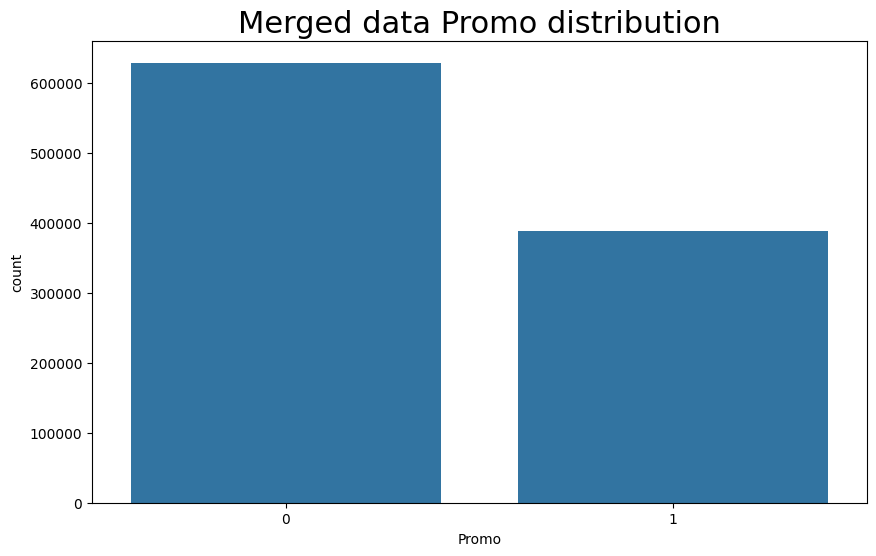

2024-09-21 08:19:16,934 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 08:19:16,949 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


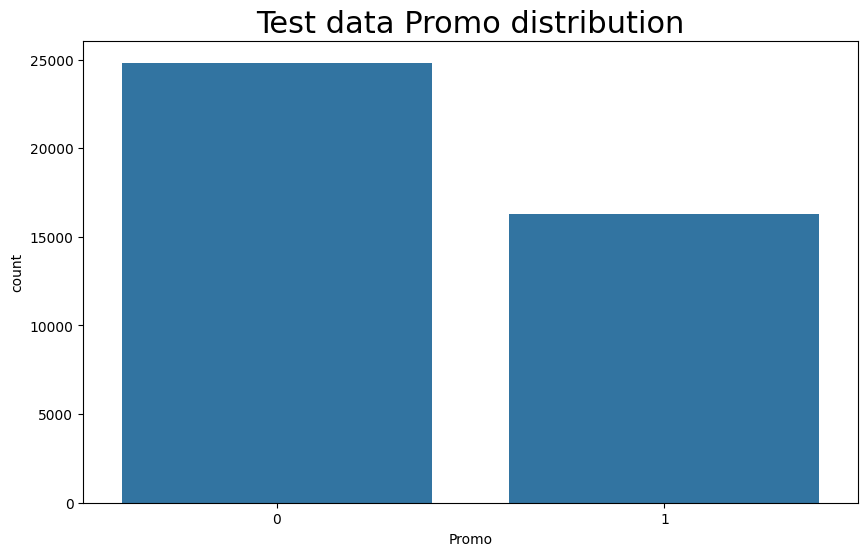

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Promo', data=df_merged)
plt.title('Merged data Promo distribution', fontsize=22)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Promo', data=df_test)
plt.title('Test data Promo distribution', fontsize=22)
plt.show()

### Sales Beavior during holidays

2024-09-21 08:19:17,025 - INFO - Analyzing the Sales behavior during holidays


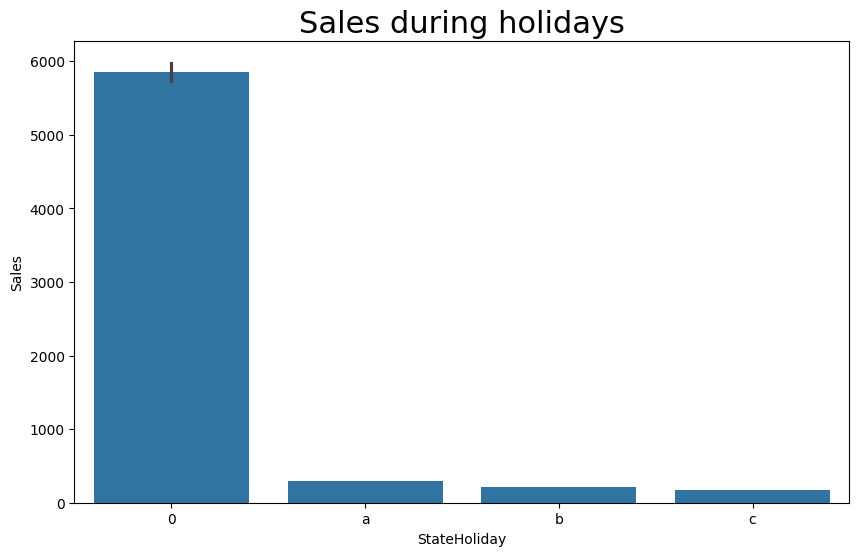

In [13]:
logger.info('Analyzing the Sales behavior during holidays')
holiday_sales = df_merged.groupby('StateHoliday')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Sales during holidays', fontsize=22)
plt.show()

### plot sales trends across they year, highlighting the holidays

2024-09-21 08:19:17,154 - INFO - Analyzing the Seasonal Sales trends across the year using month


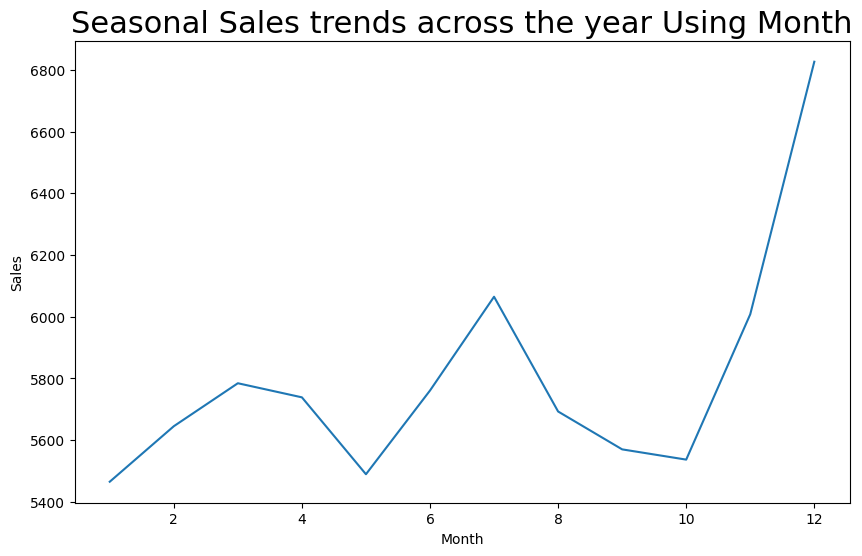

2024-09-21 08:19:17,263 - INFO - Analyzing the Seasonal Sales trends across the year using year


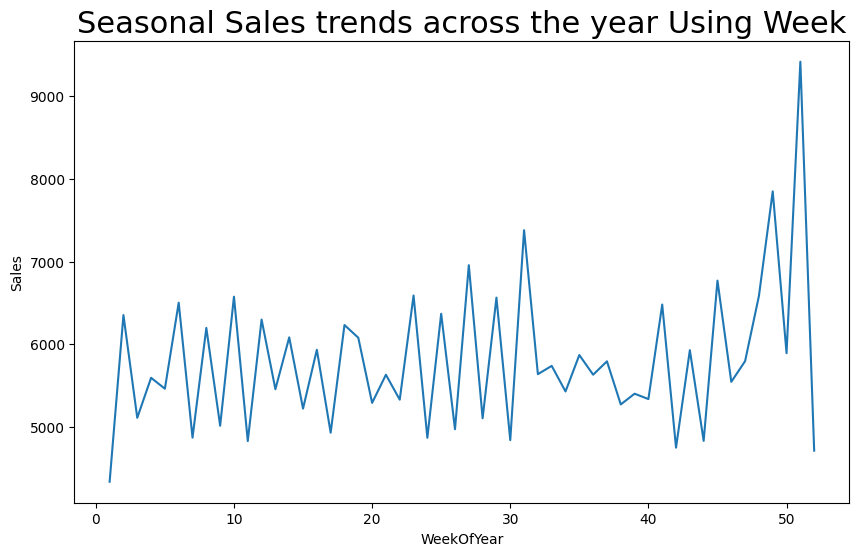

In [14]:
# plot sales trends across they year, highlighting the holidays
logging.info('Analyzing the Seasonal Sales trends across the year using month')
plt.figure(figsize=(10,6))
df_merged.groupby('Month')['Sales'].mean().plot()
plt.title('Seasonal Sales trends across the year Using Month', fontsize=22)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# plot sales trends across they year, highlighting the holidays
logging.info('Analyzing the Seasonal Sales trends across the year using year')
plt.figure(figsize=(10,6))
df_merged.groupby('WeekOfYear')['Sales'].mean().plot()
plt.title('Seasonal Sales trends across the year Using Week', fontsize=22)
plt.xlabel('WeekOfYear')
plt.ylabel('Sales')
plt.show()

### Correlation between the Sales and the customers

2024-09-21 08:19:17,362 - INFO - Analyzing correlation between sales and customers


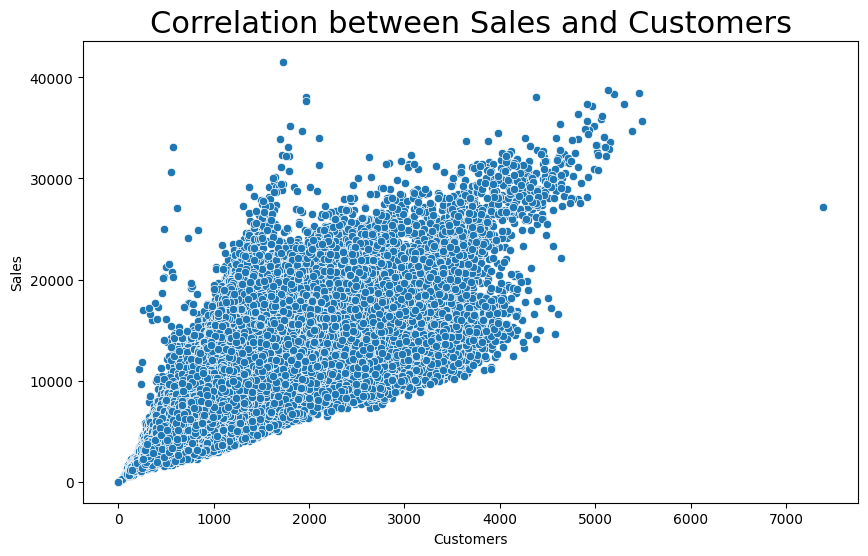

2024-09-21 08:19:18,584 - INFO - Correlation between Sales and Customers: 0.8947107733016734


In [15]:
# Scatter plot and correlation coefficient
logger.info("Analyzing correlation between sales and customers")
plt.figure(figsize=(10,6))
sns.scatterplot(x='Customers', y='Sales', data=df_merged)
plt.title('Correlation between Sales and Customers', fontsize=22)
plt.show()

correlation = df_merged[['Sales', 'Customers']].corr().iloc[0, 1]
logger.info(f"Correlation between Sales and Customers: {correlation}")

### Impact of Promo on Sales and Customers

2024-09-21 08:19:18,590 - INFO - Analyzing the Impact of Promo on Sales
2024-09-21 08:19:18,976 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 08:19:19,328 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


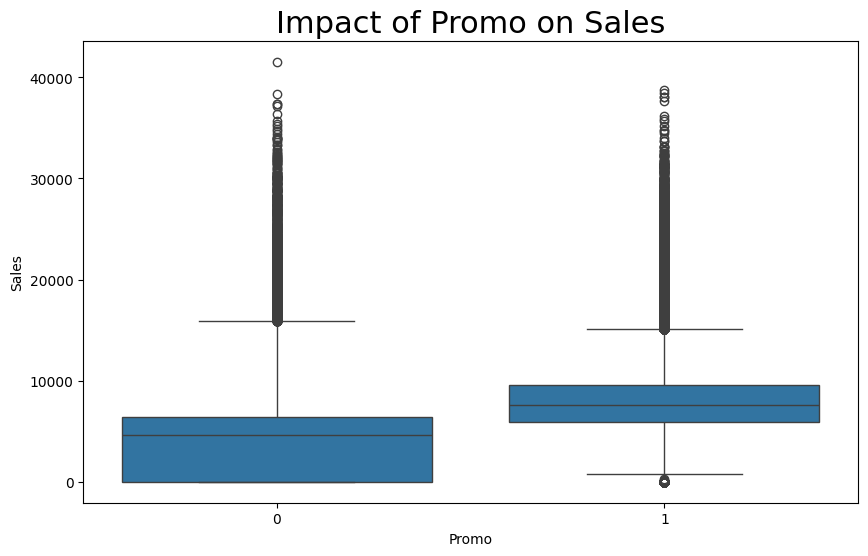

2024-09-21 08:19:19,539 - INFO - Analyzing the Impact of Promo on Customers
2024-09-21 08:19:19,909 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 08:19:20,274 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


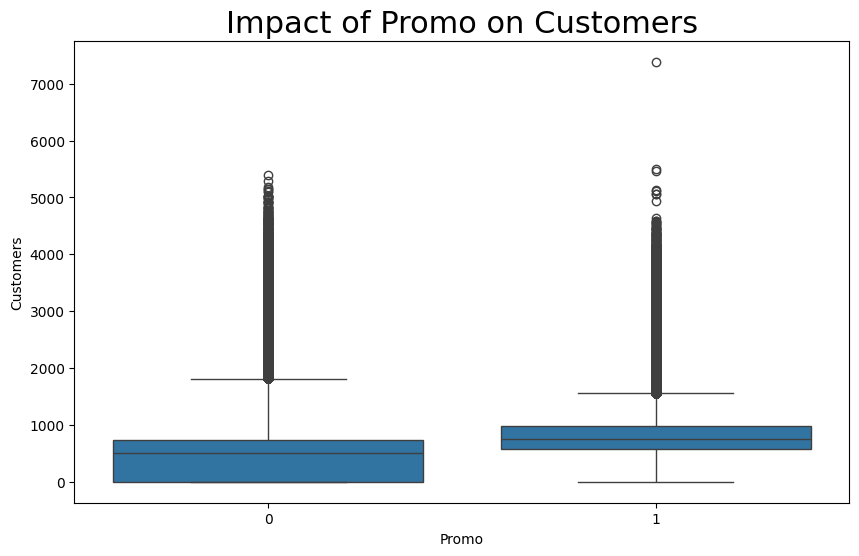

In [16]:
logging.info('Analyzing the Impact of Promo on Sales')
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Sales', data=df_merged)
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Impact of Promo on Sales', fontsize=22)
plt.show()


logging.info('Analyzing the Impact of Promo on Customers')
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Customers', data=df_merged)
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.title('Impact of Promo on Customers', fontsize=22)
plt.show()

### Analysing the effect of assortment type on Sales

2024-09-21 08:19:20,508 - INFO - Analyzing the effect of assortment type on sales


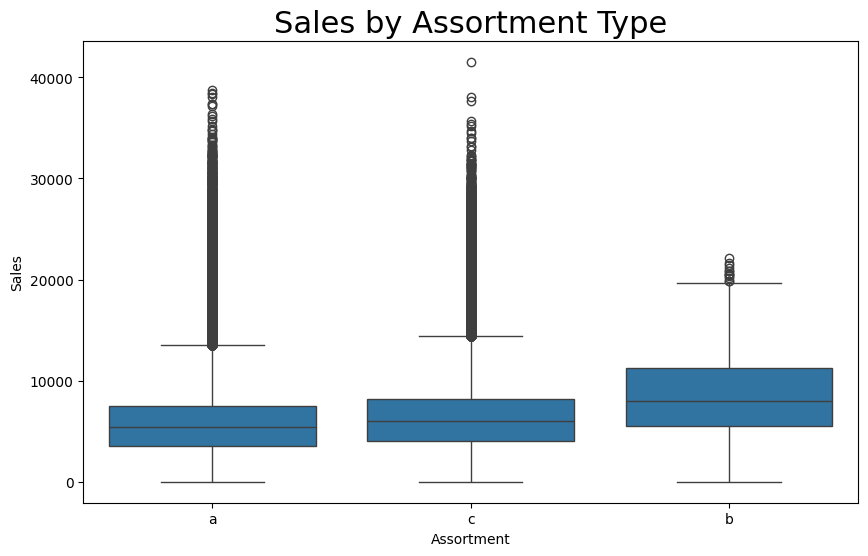

In [17]:
logger.info("Analyzing the effect of assortment type on sales")
plt.figure(figsize=(10,6))
sns.boxplot(x='Assortment', y='Sales',  data=df_merged)
plt.title('Sales by Assortment Type', fontsize=22)
plt.show()

### Analysing the effect of competation distance on sales

2024-09-21 08:19:21,412 - INFO - Analyzing the effect of competition distance on sales


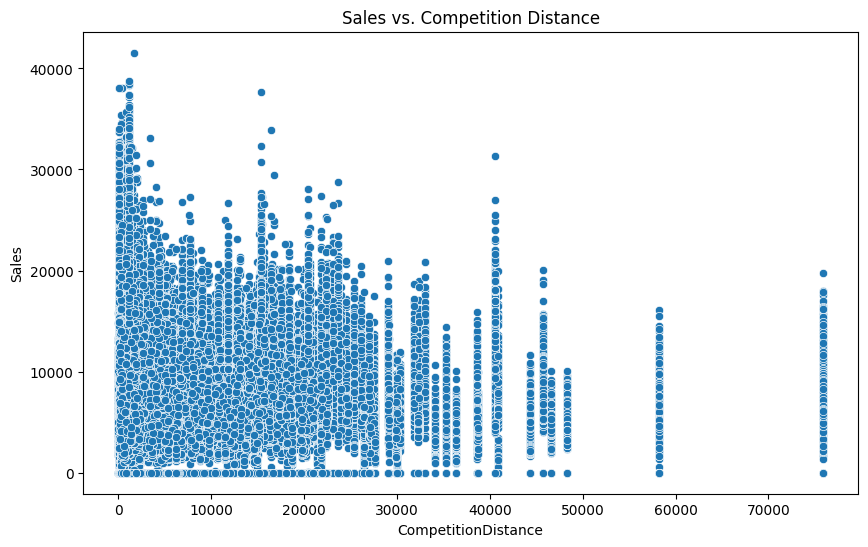

In [18]:
logger.info("Analyzing the effect of competition distance on sales")
plt.figure(figsize=(10,6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df_merged)
plt.title("Sales vs. Competition Distance")
plt.show()


### Analyzing customer behavior around store opening times

2024-09-21 08:19:22,714 - INFO - Analyzing customer behavior around store opening times


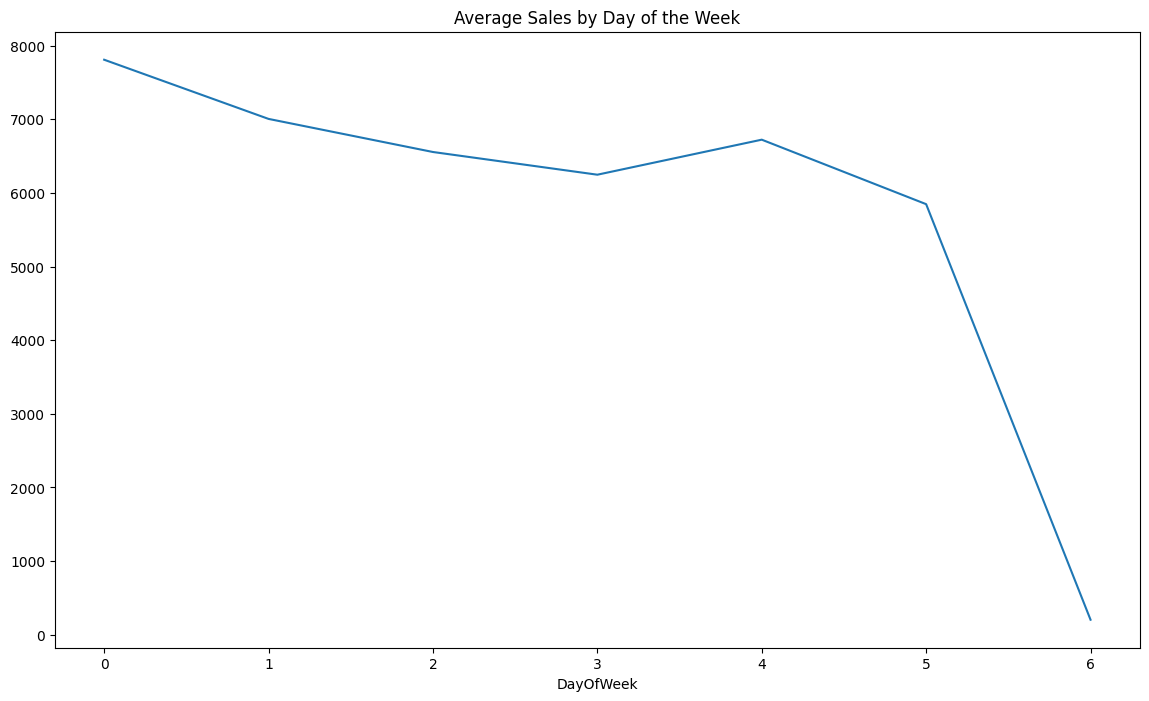

In [19]:
logging.info('Analyzing customer behavior around store opening times')
plt.figure(figsize=(14,8))
df_merged.groupby('DayOfWeek')['Sales'].mean().plot()
plt.title("Average Sales by Day of the Week")
plt.show()

### save notebook and log files

In [20]:
log_filename = 'eda_task1.log'
fh = logging.FileHandler(log_filename)
fh.setLevel(logging.INFO)
logger.addHandler(fh)

logger.info("EDA Task 1 completed successfully")

2024-09-21 08:19:22,839 - INFO - EDA Task 1 completed successfully


In [21]:
df_merged.to_csv('../data/merged.csv',index=False)